# Puebla´s got Talent

## Assets

We have three different songs with which the comparison can be made with the recording made by the user. These three different songs are located in the assets folder.
- Demo0.wav
- Demo1.wav
- Demo2.wav

All recordings made by the user are saved in the recordings folder.

---

## Choosing the song

Once the user has chosen the song, we get the length of the song. Actually this is not necessary if we save it in a database, but for tests we do this step.

For this first example we decided to choose the file "Demo0.wav".

In [1]:
import wave
wav_obj = wave.open('assets/Demo0.wav', 'rb')

sample_freq = wav_obj.getframerate()
n_samples = wav_obj.getnframes()
t_audio = n_samples/sample_freq
t_audio

19.316009070294786

## Audio recording

When we already know the length of the selected song, we know the size of the new recording.

In [2]:
# import required libraries
import sounddevice as sd
from scipy.io.wavfile import write
import wavio as wv

# Sampling frequency
freq = 44100

# Recording duration
duration = t_audio

# Start recorder with the given values
# of duration and sample frequency
recording = sd.rec(int(duration * freq), samplerate=freq, channels=2)

# Record audio for the given number of seconds
sd.wait()

# This will convert the NumPy array to an audio
# file with the given sampling frequency
write("recordings/recording0.wav", freq, recording)

# Convert the NumPy array to audio file
wv.write("recordings/recording1.wav", recording, freq, sampwidth=2)

## Visualizing the song

In [3]:
# Open the audio file
wav_obj = wave.open('recordings/recording1.wav', 'rb')

# Get the sample frequency
sample_freq = wav_obj.getframerate()

# Number of individual frams
n_samples = wav_obj.getnframes()

# Audio length
t_audio = n_samples/sample_freq

# Number of channes 
n_channels = wav_obj.getnchannels()

# Amplitude of the signal
signal_wave = wav_obj.readframes(n_samples)

In [4]:
import numpy as np
#  Returns all data from both channels as a 1-dimensional array.
signal_array = np.frombuffer(signal_wave, dtype=np.int16)

In [7]:
l_channel = signal_array[0::2]
r_channel = signal_array[1::2]

## Plotting the Signal Amplitude

In [8]:
times = np.linspace(0, n_samples/sample_freq, num=n_samples)

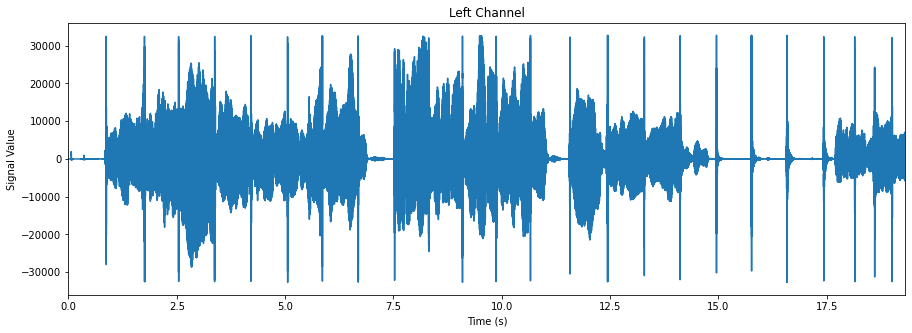

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.plot(times, l_channel)
plt.title('Left Channel')
plt.ylabel('Signal Value')
plt.xlabel('Time (s)')
plt.xlim(0, t_audio)
plt.show()

## Plotting the Frequency Spectrum

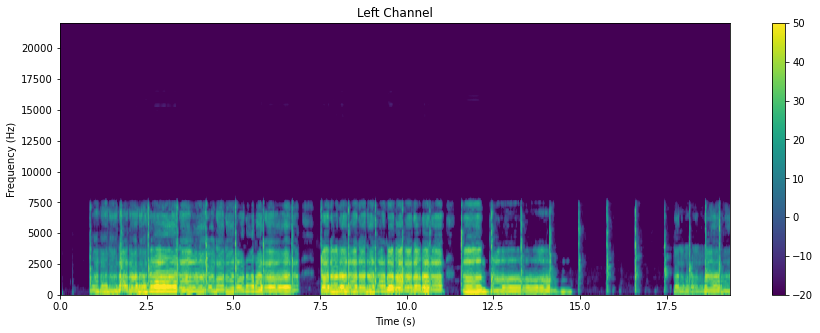

In [12]:
plt.figure(figsize=(15, 5))
plt.specgram(l_channel, Fs=sample_freq, vmin=-20, vmax=50)
plt.title('Left Channel')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.xlim(0, t_audio)
plt.colorbar()
plt.show()